# Scikit-optimize

Scikit-optimize is a well polished package for single-objective Bayesian optimization.  
Features:
* GPs and tree-based surrogate models from scikit-learn
* Search space definitions for continuous, discrete and categorical variables and transforms
* Batch proposals
* Nice plotting functions
* BayesSearchCV as drop-in replacement for RandomSearchCV in scikit-learn

Drawbacks:
* Only single-objective and single-task
* Only analytic acquisitions: GP-EI, GP-CB and GP-PI
* Limited GP modeling
* Limited support for constraints (starting from v0.8): effectively only sum constraints together with rejection sampling which does not work for high dimensional spaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skopt
import skopt.plots

### Example

Bayesian optimization with a GP is implemented in `skopt.gp_minimize`.

In [2]:
def branin(x):
    return skopt.benchmarks.branin(x) + 0.1 * np.random.randn()

bounds = [(-5, 10), (0, 15)]

In [3]:
result = skopt.gp_minimize(
    branin,              # function to minimize
    bounds,              # bounds on each dimension of x
    acq_func="EI",       # acquisition function (EI, LCB, PI)
    n_calls=15,          # number of evaluations of f, including initial design calls
    n_random_starts=5,   # number of initial design points
    noise=0.1**2,        # estimated noise level (optional)
)

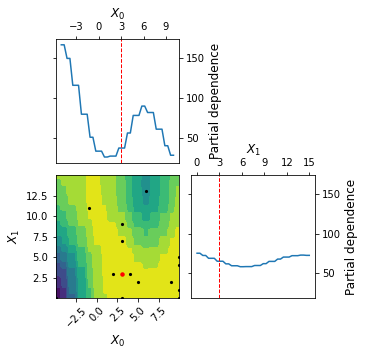

In [4]:
skopt.plots.plot_objective(result);

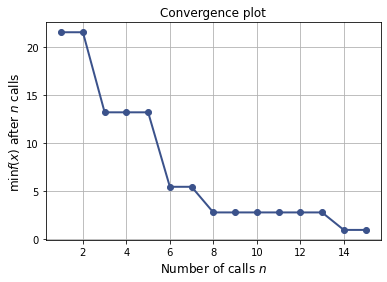

In [5]:
skopt.plots.plot_convergence(result);

### Search spaces

In [6]:
space = skopt.utils.normalize_dimensions([
    (1, 10000, 'log-uniform'),  # 'log-uniform' log-normalizes the dimension
    (1.2, 9.7), 
    ('a', 'b', 'c', 'd'), 
    (34., 42.2, 31)
])
space

Space([Integer(low=1, high=10000, prior='uniform', transform='normalize'),
       Real(low=1.2, high=9.7, prior='uniform', transform='normalize'),
       Categorical(categories=('a', 'b', 'c', 'd'), prior=None),
       Categorical(categories=(34.0, 42.2, 31), prior=None)])

In [7]:
x = space.rvs()
x

[[6842, 2.311950142850264, 'c', 31]]

In [8]:
space.transform(x)

array([[0.68416842, 0.13081766, 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ]])

In [9]:
space.inverse_transform(space.transform(x))

[[6842, 2.311950142850264, 'c', 31]]

In [10]:
%load_ext watermark
%watermark -v -m -p skopt

CPython 3.8.2
IPython 7.13.0

skopt 0.7.4

compiler   : GCC 9.3.0
system     : Linux
release    : 4.4.0-43-Microsoft
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit
